<a href="https://colab.research.google.com/github/EvgenyBelov78/DA1/blob/main/Salaries_in_SF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [ ]:
!wget https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv 

--2022-11-06 11:54:00--  https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sf-salaries?select=Salaries.csv’

sf-salaries?select=     [ <=>                ]  16.88K  --.-KB/s    in 0.001s  

2022-11-06 11:54:00 (20.3 MB/s) - ‘sf-salaries?select=Salaries.csv’ saved [17286]



In [2]:
url='https://raw.githubusercontent.com/Kokkalo4/Kaggle-SF-Salaries/master/Salaries.csv'

In [3]:
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [5]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [6]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [7]:
df['Year'].value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

In [8]:
df['Agency'].value_counts()

San Francisco    148654
Name: Agency, dtype: int64

In [9]:
df['Status'].value_counts() 

FT    22334
PT    15785
Name: Status, dtype: int64

In [10]:
df['Notes'].value_counts() 

Series([], Name: Notes, dtype: int64)

In [11]:
df[df.Status.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.0,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [12]:
df[df.EmployeeName.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [13]:
df[df.JobTitle.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [14]:
df[df.BasePay.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.0,149934.11,149934.11,2013,NaN,San Francisco,NaN
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.0,110485.41,131264.41,2013,NaN,San Francisco,NaN
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.0,8841.48,120000.00,128841.48,2013,NaN,San Francisco,NaN
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.0,106079.31,106079.31,2013,NaN,San Francisco,NaN
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110526,110527,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.67,0.0,10.67,10.67,2013,NaN,San Francisco,NaN
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.0,5.56,5.56,2013,NaN,San Francisco,NaN
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.00,-8.20,2013,NaN,San Francisco,NaN


In [15]:
df[(df['JobTitle'].str.lower().str.find('police')>-1)&(df['JobTitle'].str.upper().str.find('DEPARTMENT')==-1)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
25,26,GREGORY SUHR,CHIEF OF POLICE,256470.41,0.0,11522.18,NaN,267992.59,267992.59,2011,NaN,San Francisco,NaN
111,112,C PETRUZZELLA,POLICE OFFICER III,63811.18,57966.33,98578.97,NaN,220356.48,220356.48,2011,NaN,San Francisco,NaN
224,225,RAYMOND KOENIG,POLICE OFFICER I,63625.16,41441.44,97799.84,NaN,202866.44,202866.44,2011,NaN,San Francisco,NaN
228,229,SAM YUEN,POLICE OFFICER II,110242.81,16939.01,75533.1,NaN,202714.92,202714.92,2011,NaN,San Francisco,NaN
244,245,MICHAEL SIMMONS,POLICE OFFICER III,112441.8,17715.27,71120.05,NaN,201277.12,201277.12,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148312,148313,Jerome J Alamil,Police Officer,309.90,0.00,0.00,64.52,309.90,374.42,2014,NaN,San Francisco,PT
148409,148410,Dennis V Cravalho,Police Officer,0.00,0.00,242.66,0.00,242.66,242.66,2014,NaN,San Francisco,PT
148437,148438,Elizabeth A Maron,Police Officer 3,0.00,0.00,212.39,0.00,212.39,212.39,2014,NaN,San Francisco,PT
148506,148507,Patricia O Williams,Community Police Services Aide,0.00,0.00,134.78,0.00,134.78,134.78,2014,NaN,San Francisco,PT


In [ ]:
df['Dept']='Police' df[(df['JobTitle'].str.lower().str.find('police')>-1)&(df['JobTitle'].str.upper().str.find('DEPARTMENT')==-1)]

In [16]:
df.loc[df['JobTitle'].str.lower().str.find('police')>-1,['Dept']]='Police'

In [17]:
df.loc[df['JobTitle'].str.lower().str.find('medicine')>-1,['Dept']]='Medicine'

In [18]:
df[(df['JobTitle'].str.lower().str.find('medicine')>-1)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept


In [19]:
df.loc[df['JobTitle'].str.lower().str.find('medical')>-1,['Dept']]='Medicine'

In [20]:
df.loc[df['JobTitle'].str.lower().str.find('fire')>-1,['Dept']]='Fire'

In [21]:
df[(df['Dept']=='Fire')&(df['Year']==2011)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,Fire
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN,Fire
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN,Fire
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN,Fire
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.9,NaN,299494.17,299494.17,2011,NaN,San Francisco,NaN,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34790,34791,CHARLES JOHNSON,FIREFIGHTER,0.0,0.0,1966.11,NaN,1966.11,1966.11,2011,NaN,San Francisco,NaN,Fire
34927,34928,THOMAS LEEPER,FIRE FIGHTER PARAMEDIC,0.0,11.21,1707.63,NaN,1718.84,1718.84,2011,NaN,San Francisco,NaN,Fire
35811,35812,ROBERTO LUCHA,FIREFIGHTER,0.0,217.1,185.07,NaN,402.17,402.17,2011,NaN,San Francisco,NaN,Fire
36076,36077,DEBRA TANIS,FIRE RESCUE PARAMEDIC,0.0,0.0,92.21,NaN,92.21,92.21,2011,NaN,San Francisco,NaN,Fire


In [22]:
df[df['BasePay'].isna()].sort_values('BasePay',ascending=False)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.0,149934.11,149934.11,2013,NaN,San Francisco,NaN,NaN
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.0,110485.41,131264.41,2013,NaN,San Francisco,NaN,NaN
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.0,8841.48,120000.00,128841.48,2013,NaN,San Francisco,NaN,NaN
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.0,106079.31,106079.31,2013,NaN,San Francisco,NaN,Police
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,NaN,San Francisco,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110526,110527,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.67,0.0,10.67,10.67,2013,NaN,San Francisco,NaN,NaN
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.0,5.56,5.56,2013,NaN,San Francisco,NaN,NaN
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN,Police
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.00,-8.20,2013,NaN,San Francisco,NaN,Police


In [23]:
df.groupby('EmployeeName')['EmployeeName'].count().sort_values(ascending=False)

EmployeeName
Kevin Lee             13
Steven Lee            11
William Wong          11
Richard Lee           11
John Chan              9
                      ..
JIMMY GU               1
JIMMY FORD             1
JIMMY DEL ROSARIO      1
JIMMY CHIN             1
KIMBERLY HIROSHIMA     1
Name: EmployeeName, Length: 110811, dtype: int64

In [24]:
df.groupby('Dept')['Dept'].count().sort_values(ascending=False)

Dept
Police      8201
Fire        5879
Medicine    1687
Name: Dept, dtype: int64

In [25]:
df[(df['Dept']!='NaN')&(df['BasePay']=='Not Provided')] 
#.groupby('Dept')['BasePay'].mean().sort_values(ascending=False)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN,NaN


In [26]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
Dept                132887
dtype: int64

In [27]:
df.dropna(subset=['BasePay'],inplace=True)

In [28]:
df=df.drop(df[df['BasePay']=='Not Provided'].index)

In [29]:
df[df['BasePay']=='Not Provided'] 

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept


In [30]:
df.groupby('Dept')['Dept'].count().sort_values(ascending=False)

Dept
Police      8177
Fire        5858
Medicine    1687
Name: Dept, dtype: int64

In [73]:
df['BasePay']=df['BasePay'].astype(str).astype(float)

In [75]:
df['OvertimePay']=df['OvertimePay'].astype(str).astype(float)

In [77]:
df['OtherPay']=df['OtherPay'].astype(str).astype(float)

In [79]:
df['Benefits']=df['Benefits'].astype(str).astype(float)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148045 entries, 0 to 148653
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148045 non-null  int64  
 1   EmployeeName      148045 non-null  object 
 2   JobTitle          148045 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148045 non-null  float64
 5   OtherPay          148045 non-null  float64
 6   Benefits          111886 non-null  float64
 7   TotalPay          148045 non-null  float64
 8   TotalPayBenefits  148045 non-null  float64
 9   Year              148045 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148045 non-null  object 
 12  Status            38119 non-null   object 
 13  Dept              15722 non-null   object 
dtypes: float64(7), int64(2), object(5)
memory usage: 16.9+ MB


In [89]:
df.groupby(['Dept','Year'])['BasePay'].mean().sort_values(ascending=False)

Dept      Year
Fire      2013    116159.283273
          2012    109222.646825
          2014    108179.287505
          2011    106549.269212
Police    2011    105981.214773
          2013    102405.836515
          2012     96229.006186
          2014     93872.060295
Medicine  2011     57342.245104
          2014     56816.499521
          2013     55630.664871
          2012     53843.100992
Name: BasePay, dtype: float64

In [91]:
df.groupby(['Dept','Year'])['BasePay'].median().sort_values(ascending=False)

Dept      Year
Police    2013    118618.940
Fire      2013    116956.710
          2014    112703.720
Police    2014    112164.030
          2011    111976.140
          2012    111549.690
Fire      2012    110847.100
          2011    105934.670
Medicine  2014     60364.975
          2013     59834.000
          2012     56968.710
          2011     53822.610
Name: BasePay, dtype: float64

In [90]:
df.groupby(['Dept','Year'])['BasePay'].max().sort_values(ascending=False)

Dept      Year
Police    2013    319275.01
Fire      2013    313686.01
Police    2014    307450.04
          2012    302578.00
Fire      2014    302068.00
          2012    296943.01
          2011    285262.00
Medicine  2013    271831.50
          2014    268946.02
Police    2011    261717.60
Medicine  2011    257510.59
          2012    254878.82
Name: BasePay, dtype: float64

In [94]:
df.groupby(['Dept','Year'])['EmployeeName'].count()

Dept      Year
Fire      2011    1459
          2012    1449
          2013    1439
          2014    1511
Medicine  2011     431
          2012     393
          2013     425
          2014     438
Police    2011    2512
          2012    1919
          2013    1845
          2014    1901
Name: EmployeeName, dtype: int64

In [101]:
df.groupby(['Dept','Year'])['BasePay',"OvertimePay","OtherPay",'Benefits'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


BasePay  OvertimePay     OtherPay     Benefits
Dept     Year                                                     
Fire     2011  1.554554e+08  31898485.78  24209396.38         0.00
         2012  1.582636e+08  40499542.12  22188183.55  52859030.29
         2013  1.671532e+08  43978891.99  23000110.87  56541337.10
         2014  1.634589e+08  38625129.76  22744834.21  60707949.89
Medicine 2011  2.471451e+07   1135499.38   1071479.57         0.00
         2012  2.116034e+07    516335.45    452732.20   9703275.84
         2013  2.364303e+07    520985.76    509491.75   9108516.82
         2014  2.488563e+07    544616.97    507614.43  10195686.16
Police   2011  2.662248e+08  22225776.17  30817507.53         0.00
         2012  1.846635e+08  24739129.82  13698860.23  57429170.22
         2013  1.889388e+08  24573767.45  15642567.66  59106443.82
         2014  1.784508e+08  26684074.32  15365391.86  61511276.28

In [118]:
dfpolice=df[df['Dept']=='Police'].groupby(['Year'])['BasePay',"OvertimePay","OtherPay",'Benefits'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [119]:
dffire=df[df['Dept']=='Fire'].groupby(['Year'])['BasePay',"OvertimePay","OtherPay",'Benefits'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [120]:
dfmedicine=df[df['Dept']=='Medicine'].groupby(['Year'])['BasePay',"OvertimePay","OtherPay",'Benefits'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [103]:
dfpolice

,BasePay,OvertimePay,OtherPay,Benefits
Year,,,,
2011,2.662248e+08,22225776.17,30817507.53,0.00
2012,1.846635e+08,24739129.82,13698860.23,57429170.22
2013,1.889388e+08,24573767.45,15642567.66,59106443.82
2014,1.784508e+08,26684074.32,15365391.86,61511276.28


In [109]:
dfpolice.reset_index(drop= False, inplace = True)

In [143]:
dfmedicine

,BasePay,OvertimePay,OtherPay,Benefits
Year,,,,
2011,24714507.64,1135499.38,1071479.57,0.00
2012,21160338.69,516335.45,452732.20,9703275.84
2013,23643032.57,520985.76,509491.75,9108516.82
2014,24885626.79,544616.97,507614.43,10195686.16


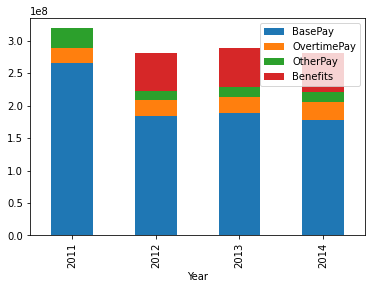

In [115]:
dfpolice.set_index('Year').plot(kind='bar',stacked= True )

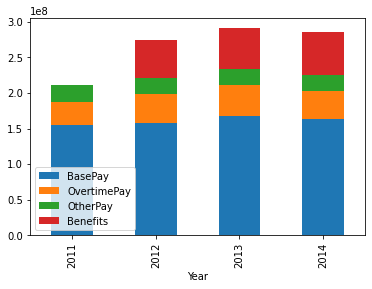

In [122]:
dffire.plot(kind='bar',stacked= True )

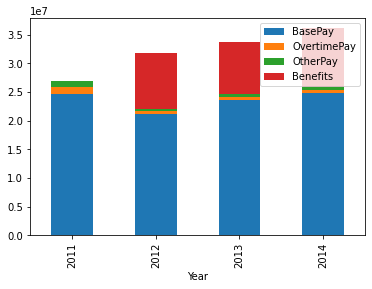

In [123]:
dfmedicine.plot(kind='bar',stacked= True )

In [130]:
df.fillna(0)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept,Summa
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,0.0,San Francisco,0,0,0.00
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,0.0,San Francisco,0,Police,0.00
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,0.0,San Francisco,0,Police,0.00
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,0.0,San Francisco,0,0,0.00
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,0.0,San Francisco,0,Fire,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,0.0,San Francisco,PT,0,0.00
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,0.0,San Francisco,PT,0,0.00
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,0.0,San Francisco,PT,0,0.00
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,0.0,San Francisco,PT,0,0.00


In [159]:
df['Summa']=df['BasePay']+df["OvertimePay"]+df["OtherPay"]+df['Benefits']

In [158]:
df.loc[df.Benefits.isna(),'Benefits']=0

In [160]:
df[df['Benefits'].isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Dept,Summa


In [161]:
df.groupby(['Year'])['Summa'].sum()

Year
2011    2.594195e+09
2012    3.696940e+09
2013    3.808882e+09
2014    3.821866e+09
Name: Summa, dtype: float64

In [164]:
dfbudget=df.groupby(['Dept','Year'])['Summa'].sum()

In [165]:
dfbudget

Dept      Year
Fire      2011    2.115633e+08
          2012    2.738104e+08
          2013    2.906735e+08
          2014    2.855368e+08
Medicine  2011    2.692149e+07
          2012    3.183268e+07
          2013    3.378203e+07
          2014    3.613354e+07
Police    2011    3.192681e+08
          2012    2.805306e+08
          2013    2.882615e+08
          2014    2.820115e+08
Name: Summa, dtype: float64

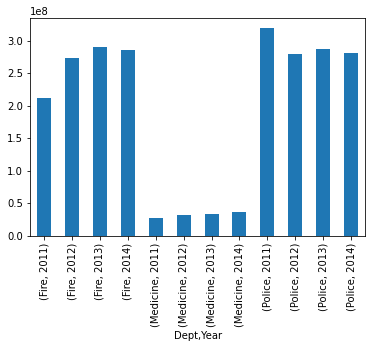

In [166]:
dfbudget.plot(kind='bar',stacked= True )

In [31]:
import psycopg2
import sqlite3

In [38]:
DB_HOST = '178.170.196.15'
DB_USER = 'student4'
DB_USER_PASSWORD = 'student4_password'
DB_NAME = 'sql_ex_for_student4'
conn=psycopg2.connect(host=DB_HOST,user=DB_USER,password=DB_USER_PASSWORD,dbname=DB_NAME)

In [54]:
conn.autocommit = True
cursor = conn.cursor()
  
# drop table if it already exists
cursor.execute('drop table if exists sfsalaries')
  
sql = '''CREATE TABLE sfsalaries(Id int,	EmployeeName char(100),	JobTitle char(100),	BasePay char(100),	OvertimePay char(100),	OtherPay char(100),	Benefits char(100),	TotalPay char(100),	TotalPayBenefits char(100),	Year char(100),	Notes char(100),	Agency char(100),	Status char(100),	Dept char(100));'''
  
cursor.execute(sql)

In [55]:
df.to_sql('sfsalaries', conn, if_exists= 'replace')

DatabaseError: ignored